# env: pym2  on OWS

In [1]:
import os

In [2]:
import TimeTagger as TT
from TimeTagger import Flim, TimeTagStream, createTimeTaggerVirtual, EventGenerator, Countrate,ConstantFractionDiscriminator, DelayedChannel
#from intensity_renderer import IntensityRenderer
import numpy as np
from matplotlib.pyplot import *

from scipy.ndimage import maximum_filter

In [3]:
#dump_file = r"C:\Users\lociu\Desktop\PriyaM\Data\20230703_swab_tests\TimeTags_2023-07-03_125136.ttbin"
#dump_file= r'C:\Users\lociu\Desktop\PriyaM\Data\20230711_\CYCLE_000001_RAWDATA_000034.ttbin'

In [5]:
import glob

In [77]:
for filename in glob.glob(r'C:\Users\lociu\Desktop\swabian_data\20230712_flim\*.ttbin'):
    fr = TT.FileReader(filename)
    #print(fr.getConfiguration())
    print(os.path.getsize(filename))
    break

67648080


In [76]:
filename

'C:\\Users\\lociu\\Desktop\\swabian_data\\20230712_flim\\flu_0_00_07_12_im0_2023-07-12_112428.1.ttbin'

In [7]:
from TimeTagger import Flim, TimeTagStream, createTimeTaggerVirtual, EventGenerator, Countrate,ConstantFractionDiscriminator, DelayedChannel

In [8]:
dump_file = filename

In [9]:
laser = 1
click = laser
frame = 3 
frame_n = -3
line = 2
line_n = -2
photon = -4

n_bins = 256
binwidth = 48 # 12.5ns/256
n_pixel = 256

laser_frequency = 80e6  # 1/12.5ns

pixel_rate = 200e3
pixel_time = 1 / pixel_rate
integr_time = 3e9 # Integration time of 3 ms in picoseconds

In [20]:
time_tag_virt=TT.createTimeTaggerVirtual()
time_tag_virt.reset()

In [18]:
pixel_pattern_start = np.linspace(0, 256, num=n_pixel, endpoint=False, dtype=int) * (pixel_time * 1e12)
pixel_pattern_end = pixel_pattern_start + integr_time

In [21]:
# EventGenerator(tagger, trigger_channel, pattern, trigger_divider, stop_channel)
pixel_start_channel = EventGenerator(time_tag_virt, line, pixel_pattern_start)
pixel_start = pixel_start_channel.getChannel()

pixel_end_channel= EventGenerator(time_tag_virt, line, pixel_pattern_end)
pixel_end = pixel_end_channel.getChannel()

In [22]:
#ConstantFractionDiscriminator(tagger, channels, search_window)
photon_cfd_chan = ConstantFractionDiscriminator(time_tag_virt, (photon,), 10*1000)
photon_cfd = photon_cfd_chan.getChannels()[0]

In [23]:
#DelayedChannel(tagger, input_channel, delay)
delayed_sync_chan = DelayedChannel(time_tag_virt, laser, 11.5e3)
delayed_sync = delayed_sync_chan.getChannel()

In [38]:
photon_cfd, delayed_sync, pixel_end, pixel_start,

(260, 261, 259, 258)

In [67]:
flim = Flim(time_tag_virt, 
            start_channel=laser, 
            click_channel=4, 
            pixel_begin_channel=pixel_start, 
            pixel_end_channel=pixel_end, 
            n_pixels=n_pixel*n_pixel,
            n_bins=n_bins, 
            binwidth=binwidth,
            frame_begin_channel=frame)

In [78]:
fl = glob.glob(r'C:\Users\lociu\Desktop\swabian_data\20230712_flim\*.ttbin')
len(fl)

34

In [83]:
#fr.getConfiguration()[]
fl = [i for i in fl if not i.find('.1.')>0]
fl

['C:\\Users\\lociu\\Desktop\\swabian_data\\20230712_flim\\flu_0_00_07_12_im0_2023-07-12_112428.ttbin',
 'C:\\Users\\lociu\\Desktop\\swabian_data\\20230712_flim\\flu_0_00_07_12_im1_2023-07-12_112646.ttbin',
 'C:\\Users\\lociu\\Desktop\\swabian_data\\20230712_flim\\flu_0_02_07_12_im0_2023-07-12_113355.ttbin',
 'C:\\Users\\lociu\\Desktop\\swabian_data\\20230712_flim\\flu_0_02_07_12_im1_2023-07-12_113540.ttbin',
 'C:\\Users\\lociu\\Desktop\\swabian_data\\20230712_flim\\flu_0_03_07_12_im0_2023-07-12_114055.ttbin',
 'C:\\Users\\lociu\\Desktop\\swabian_data\\20230712_flim\\flu_0_03_07_12_im1_2023-07-12_114226.ttbin',
 'C:\\Users\\lociu\\Desktop\\swabian_data\\20230712_flim\\flu_0_04_07_12_im0_2023-07-12_114745.ttbin',
 'C:\\Users\\lociu\\Desktop\\swabian_data\\20230712_flim\\flu_0_04_07_12_im1_2023-07-12_114940.ttbin',
 'C:\\Users\\lociu\\Desktop\\swabian_data\\20230712_flim\\flu_0_05_07_12_im0_2023-07-12_115708.ttbin',
 'C:\\Users\\lociu\\Desktop\\swabian_data\\20230712_flim\\flu_0_05_07_12_

In [87]:
%%time

data= {}

for filename in fl:
    
    fr = TT.FileReader(filename)
    #print()
    well = filename.split('_')[4]

    
    flim = Flim(time_tag_virt, 
            start_channel=laser, 
            click_channel=4, 
            pixel_begin_channel=pixel_start, 
            pixel_end_channel=pixel_end, 
            n_pixels=n_pixel*n_pixel,
            n_bins=n_bins, 
            binwidth=binwidth,
            frame_begin_channel=frame)
    
    flim = Flim(time_tag_virt, start_channel=delayed_sync, click_channel=photon_cfd, pixel_begin_channel=pixel_start, n_pixels=n_pixel*n_pixel,
             n_bins=n_bins, binwidth=binwidth, pixel_end_channel=pixel_end, frame_begin_channel=frame)
    
    time_tag_virt.setReplaySpeed(-1)
    replay = time_tag_virt.replay(filename)
    time_tag_virt.waitForCompletion()
    
    flim_data = flim.getSummedFrames().reshape(256,256,256)
    data.update({filename:flim_data})
    print(well, os.path.getsize(filename),flim.getFramesAcquired(),flim_data.sum() , filename)

00 6384 49 9144 C:\Users\lociu\Desktop\swabian_data\20230712_flim\flu_0_00_07_12_im0_2023-07-12_112428.ttbin
00 5328 59 11201 C:\Users\lociu\Desktop\swabian_data\20230712_flim\flu_0_00_07_12_im1_2023-07-12_112646.ttbin
02 5600 58 6423 C:\Users\lociu\Desktop\swabian_data\20230712_flim\flu_0_02_07_12_im0_2023-07-12_113355.ttbin
02 5328 59 6653 C:\Users\lociu\Desktop\swabian_data\20230712_flim\flu_0_02_07_12_im1_2023-07-12_113540.ttbin
03 6384 91 8056 C:\Users\lociu\Desktop\swabian_data\20230712_flim\flu_0_03_07_12_im0_2023-07-12_114055.ttbin
03 6640 92 8334 C:\Users\lociu\Desktop\swabian_data\20230712_flim\flu_0_03_07_12_im1_2023-07-12_114226.ttbin
04 5328 122 10298 C:\Users\lociu\Desktop\swabian_data\20230712_flim\flu_0_04_07_12_im0_2023-07-12_114745.ttbin
04 5600 123 10520 C:\Users\lociu\Desktop\swabian_data\20230712_flim\flu_0_04_07_12_im1_2023-07-12_114940.ttbin
05 5328 155 10199 C:\Users\lociu\Desktop\swabian_data\20230712_flim\flu_0_05_07_12_im0_2023-07-12_115708.ttbin
05 6384 155 

C:\Users\lociu\Desktop\swabian_data\20230712_flim\flu_0_00_07_12_im0_2023-07-12_112428.ttbin 9144
C:\Users\lociu\Desktop\swabian_data\20230712_flim\flu_0_00_07_12_im1_2023-07-12_112646.ttbin 11201
C:\Users\lociu\Desktop\swabian_data\20230712_flim\flu_0_02_07_12_im0_2023-07-12_113355.ttbin 6423
C:\Users\lociu\Desktop\swabian_data\20230712_flim\flu_0_02_07_12_im1_2023-07-12_113540.ttbin 6653
C:\Users\lociu\Desktop\swabian_data\20230712_flim\flu_0_03_07_12_im0_2023-07-12_114055.ttbin 8056
C:\Users\lociu\Desktop\swabian_data\20230712_flim\flu_0_03_07_12_im1_2023-07-12_114226.ttbin 8334
C:\Users\lociu\Desktop\swabian_data\20230712_flim\flu_0_04_07_12_im0_2023-07-12_114745.ttbin 10298
C:\Users\lociu\Desktop\swabian_data\20230712_flim\flu_0_04_07_12_im1_2023-07-12_114940.ttbin 10520
C:\Users\lociu\Desktop\swabian_data\20230712_flim\flu_0_05_07_12_im0_2023-07-12_115708.ttbin 10199
C:\Users\lociu\Desktop\swabian_data\20230712_flim\flu_0_05_07_12_im1_2023-07-12_115918.ttbin 10960
C:\Users\lociu\

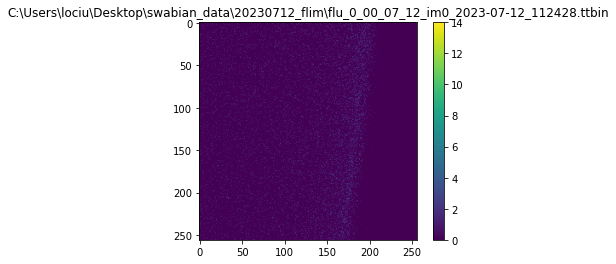

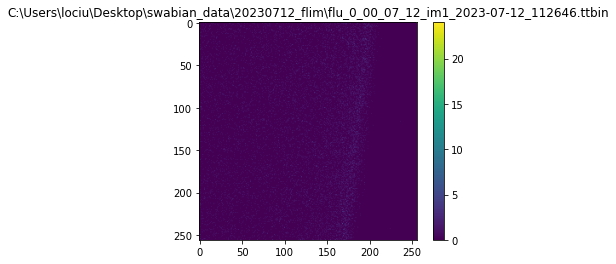

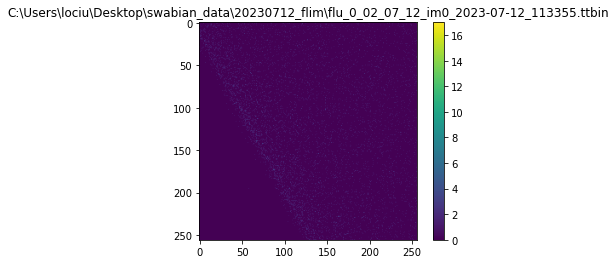

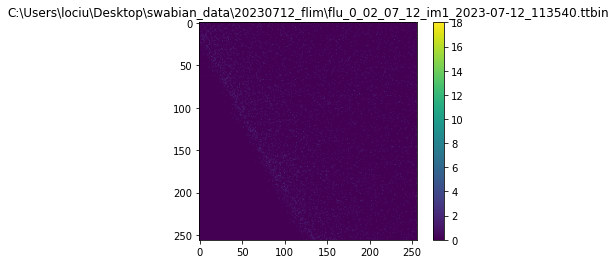

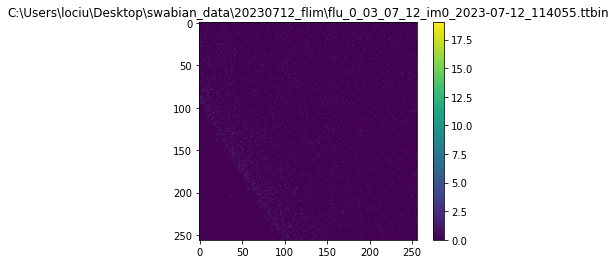

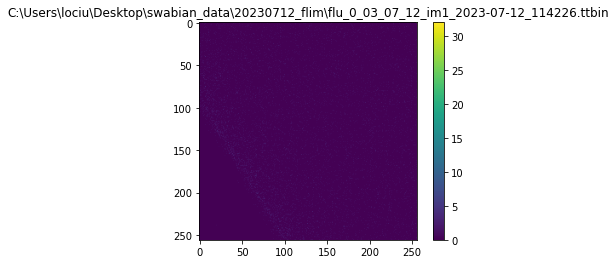

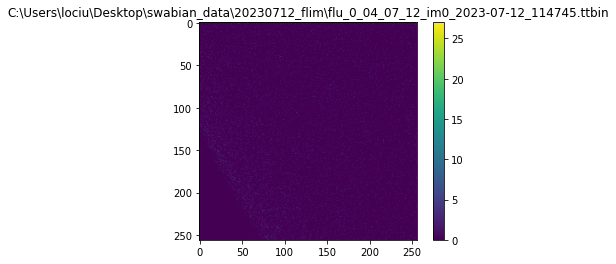

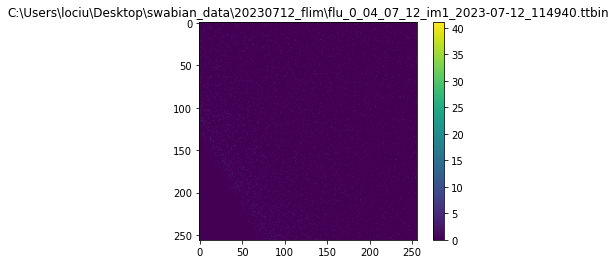

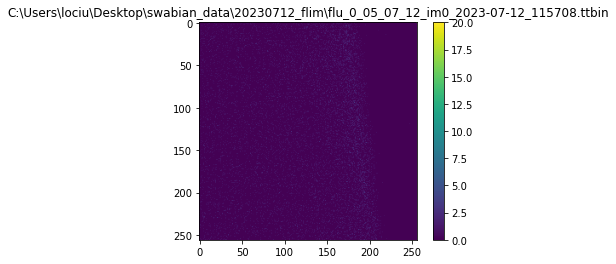

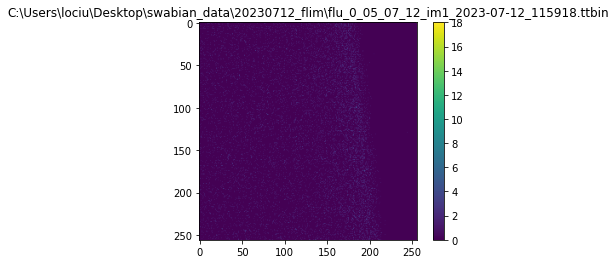

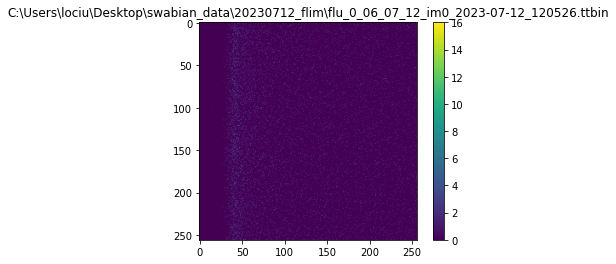

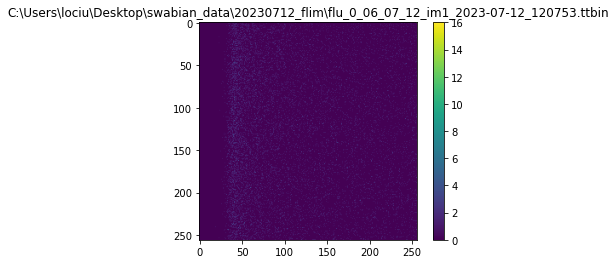

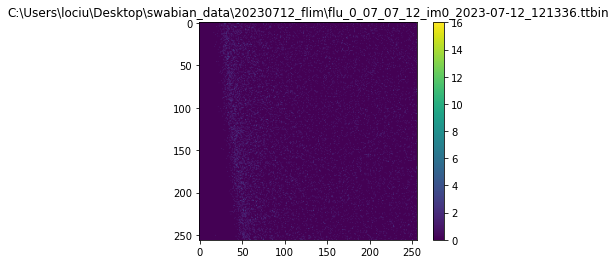

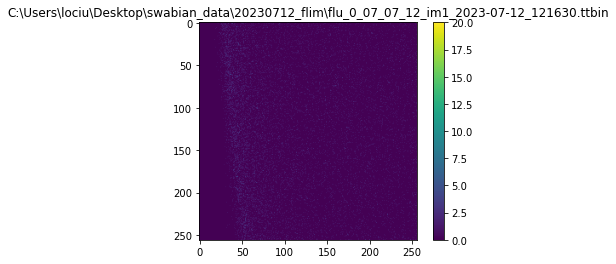

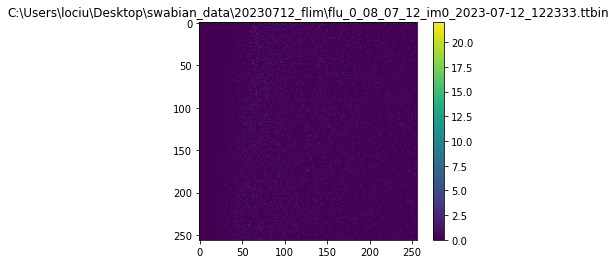

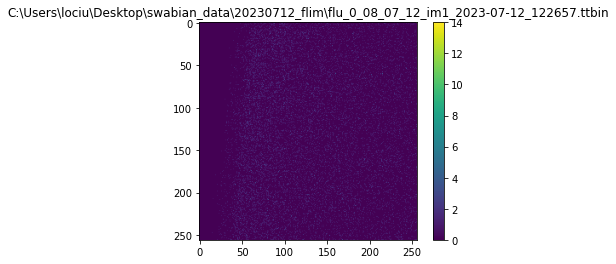

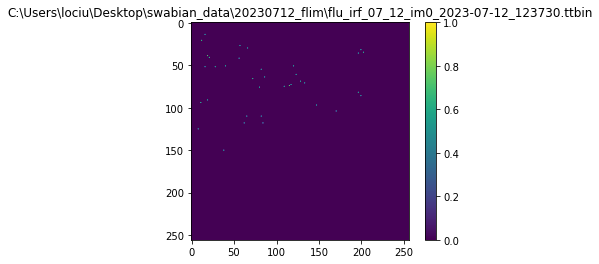

In [116]:
for data_ in data.items():
    print(data_[0], data_[1].sum())
    figure()
    imshow(data_[1].sum(2))
    title(data_[0])
    colorbar()

In [92]:
%%time
fr = TT.FileReader(filename)
fr.getData(10e6)


CPU times: total: 15.6 ms
Wall time: 23.9 ms


<TimeTagger.TimeTagStreamBuffer; proxy of <Swig Object of type 'TimeTagStreamBuffer *' at 0x00000252153C6550> >

In [97]:
%%time
fr = TT.FileReader(filename)
while fr.hasData():
    data1 = fr.getData(n_events=10e6)

# With the following methods, we can retrieve a numpy array for the particular information:
channel = data1.getChannels()            # The channel numbers
timestamps = data1.getTimestamps()       # The timestamps in ps
event_types = data1.getEventTypes()   # TimeTag = 0, Error = 1, OverflowBegin = 2, OverflowEnd = 3, MissedEvents = 4
missed_events = data1.getMissedEvents()  # The numbers of missed events in case of overflow

CPU times: total: 15.6 ms
Wall time: 27.9 ms


In [113]:
%%time
for evn in range(5):
    print()
    for ch in range(-4,5):        
        ch_1 = np.where(np.logical_and(channel==ch, event_types == evn))
        print(ch, ch_1[0].shape)
    


-4 (224549,)
-3 (0,)
-2 (0,)
-1 (0,)
0 (0,)
1 (224580,)
2 (10197,)
3 (39,)
4 (224549,)

-4 (0,)
-3 (0,)
-2 (0,)
-1 (0,)
0 (0,)
1 (0,)
2 (0,)
3 (0,)
4 (0,)

-4 (0,)
-3 (0,)
-2 (0,)
-1 (0,)
0 (0,)
1 (0,)
2 (0,)
3 (0,)
4 (0,)

-4 (0,)
-3 (0,)
-2 (0,)
-1 (0,)
0 (0,)
1 (0,)
2 (0,)
3 (0,)
4 (0,)

-4 (0,)
-3 (0,)
-2 (0,)
-1 (0,)
0 (0,)
1 (0,)
2 (0,)
3 (0,)
4 (0,)
CPU times: total: 31.2 ms
Wall time: 40.9 ms


In [114]:
#flim.waitUntilFinished()
flim.getFramesAcquired()

38

In [106]:
flim_frames = flim.getSummedFrames()

In [107]:
flim_frames.shape

(65536, 256)

In [108]:
flim_2d = flim_frames.reshape(256,256,256)

In [109]:
flim_mean = flim_2d.sum(2)
flim_mean.shape

(256, 256)

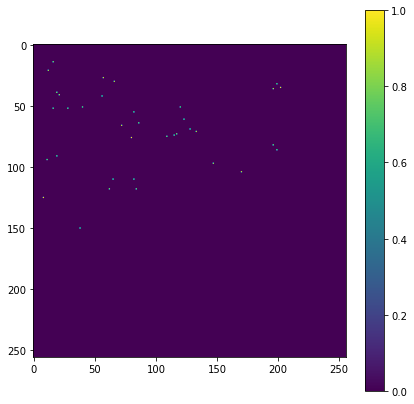

In [110]:
#rcParams['figure.figsize'] = [10,10]
figure(figsize=[7,7])
imshow(flim_mean)
colorbar()

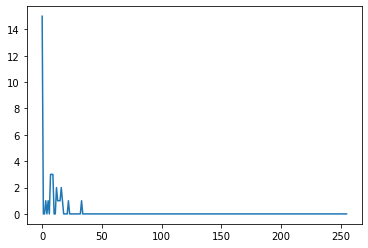

In [111]:
plot(flim_2d.sum((0,1)))

In [104]:
flim_2d.mean((0,1)).sum()

0.201690673828125